In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="notebook")

# Output directory for figures
FIG_DIR = Path("../reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)

def savefig(name: str):
    p = FIG_DIR / name
    plt.savefig(p, dpi=300, bbox_inches="tight")
    print(f"Saved {p}")

OUT = Path("../data/insurance_cleaned.csv")
df = pd.read_csv(OUT)

# Label maps for nicer plots
SEX_MAP = {0: "Female", 1: "Male"}
SMOKER_MAP = {0: "No", 1: "Yes"}

print("Shape:", df.shape)
display(df.head())
display(df.describe().T)

missing = df.isna().sum()
if missing.any():
    print("Missing values per column:")
    print(missing[missing > 0])


Shape: (1337, 9)


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.000000
sex,1337.0,0.504862,0.500163,0.0000,0.000,1.0000,1.00000,1.000000
bmi,1337.0,30.650247,6.059655,15.9600,26.290,30.4000,34.70000,47.315000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.000000
smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.000000
charges,1337.0,12491.159952,10165.511950,1121.8739,4746.344,9386.1613,16657.71745,34524.777625


Saved ..\reports\figures\charges_by_gender.png


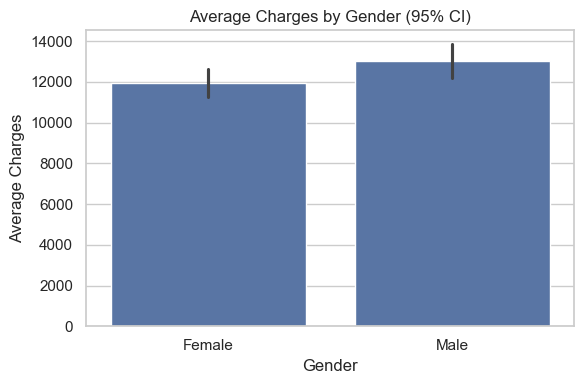

In [2]:
# Average charges by gender (with 95% CI)
plot_df = df.assign(sex_label=df["sex"].map(SEX_MAP))
plt.figure(figsize=(6,4))
try:
    sns.barplot(data=plot_df, x="sex_label", y="charges", errorbar=("ci", 95))
except TypeError:
    sns.barplot(data=plot_df, x="sex_label", y="charges", ci=95)
plt.title("Average Charges by Gender (95% CI)")
plt.xlabel("Gender")
plt.ylabel("Average Charges")
plt.tight_layout()
savefig("charges_by_gender.png")
plt.show()


Saved ..\reports\figures\smoker_dist_by_gender_counts.png


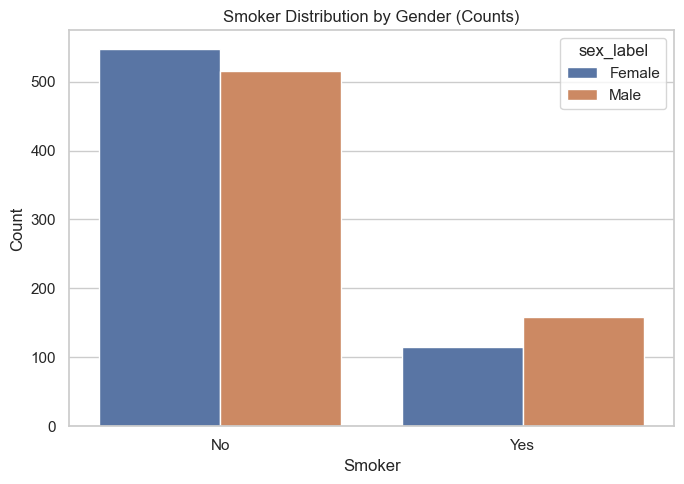

Saved ..\reports\figures\smoker_dist_by_gender_percent.png


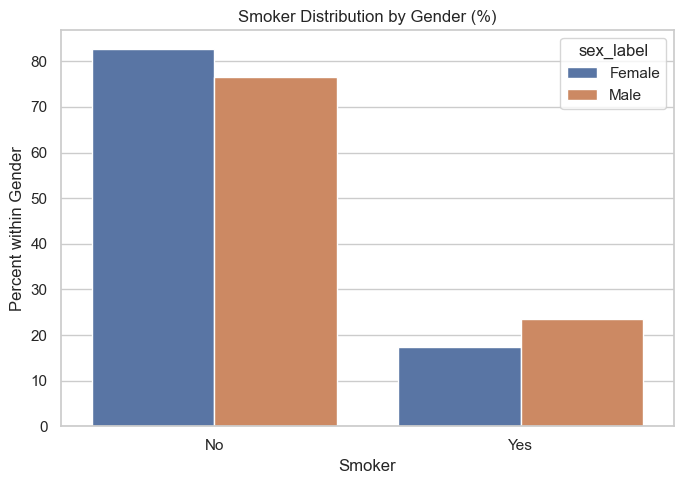

In [3]:
# Smoker distribution by gender: counts and percentages
count_df = (
    df.groupby(["sex", "smoker"]).size().reset_index(name="count")
      .assign(
          sex_label=lambda d: d["sex"].map(SEX_MAP),
          smoker_label=lambda d: d["smoker"].map(SMOKER_MAP)
      )
)

plt.figure(figsize=(7,5))
sns.barplot(data=count_df, x="smoker_label", y="count", hue="sex_label")
plt.title("Smoker Distribution by Gender (Counts)")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.tight_layout()
savefig("smoker_dist_by_gender_counts.png")
plt.show()

percent_df = count_df.copy()
percent_df["percent_within_sex"] = percent_df.groupby("sex")["count"].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize=(7,5))
sns.barplot(data=percent_df, x="smoker_label", y="percent_within_sex", hue="sex_label")
plt.title("Smoker Distribution by Gender (%)")
plt.xlabel("Smoker")
plt.ylabel("Percent within Gender")
plt.tight_layout()
savefig("smoker_dist_by_gender_percent.png")
plt.show()


Saved ..\reports\figures\charges_vs_age_by_smoker.png


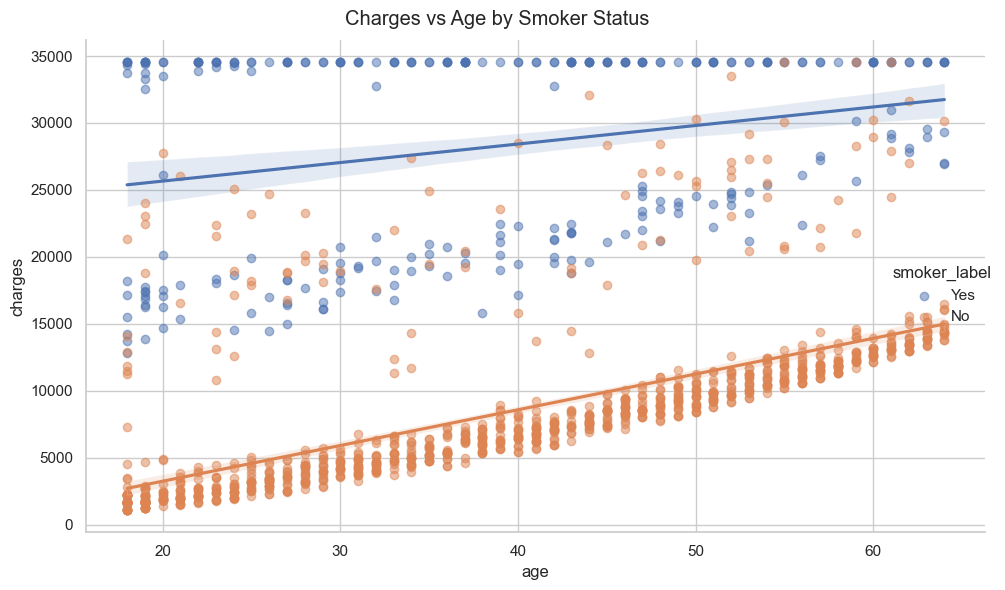

In [4]:
# Charges vs Age by Smoker status (regression fit)
plot_df = df.assign(smoker_label=df["smoker"].map(SMOKER_MAP))
g = sns.lmplot(data=plot_df, x="age", y="charges", hue="smoker_label", height=6, aspect=1.5, scatter_kws={"alpha": 0.5})
g.fig.suptitle("Charges vs Age by Smoker Status")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.93)
# Save FacetGrid figure
out_path = FIG_DIR / "charges_vs_age_by_smoker.png"
g.fig.savefig(out_path, dpi=300, bbox_inches="tight")
print(f"Saved {out_path}")


Saved ..\reports\figures\charges_by_bmi_category_and_smoker.png


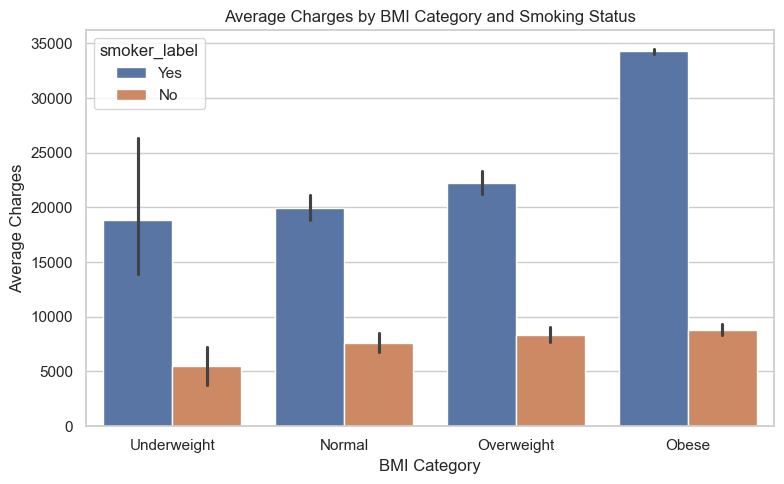

In [5]:
# Charges by BMI category and smoker status
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ["Underweight", "Normal", "Overweight", "Obese"]
df["bmi_category"] = pd.cut(df["bmi"], bins=bins, labels=labels, include_lowest=True)

plot_df = df.assign(smoker_label=df["smoker"].map(SMOKER_MAP))
plt.figure(figsize=(8,5))
try:
    sns.barplot(data=plot_df, x="bmi_category", y="charges", hue="smoker_label", order=labels, errorbar=("ci", 95))
except TypeError:
    sns.barplot(data=plot_df, x="bmi_category", y="charges", hue="smoker_label", order=labels, ci=95)
plt.title("Average Charges by BMI Category and Smoking Status")
plt.xlabel("BMI Category")
plt.ylabel("Average Charges")
plt.tight_layout()
savefig("charges_by_bmi_category_and_smoker.png")
plt.show()


Saved ..\reports\figures\charges_by_children_and_smoker.png


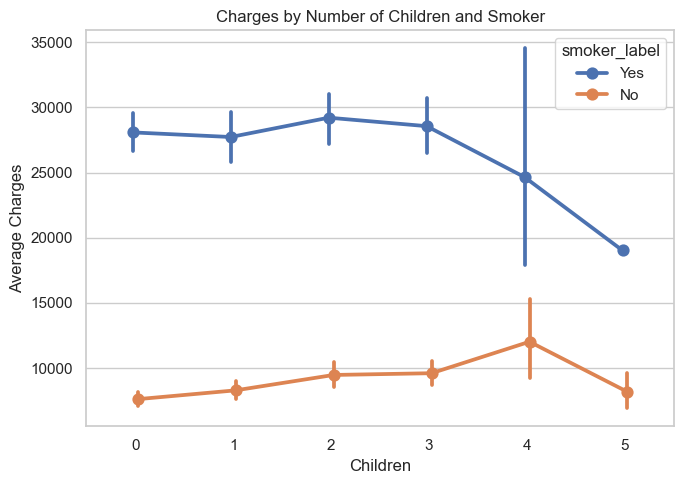

In [6]:
# Charges by number of children and smoker
plot_df = df.assign(smoker_label=df["smoker"].map(SMOKER_MAP))
plt.figure(figsize=(7,5))
try:
    sns.pointplot(data=plot_df, x="children", y="charges", hue="smoker_label", dodge=True, errorbar=("ci", 95))
except TypeError:
    sns.pointplot(data=plot_df, x="children", y="charges", hue="smoker_label", dodge=True, ci=95)
plt.title("Charges by Number of Children and Smoker")
plt.xlabel("Children")
plt.ylabel("Average Charges")
plt.tight_layout()
savefig("charges_by_children_and_smoker.png")
plt.show()


Saved ..\reports\figures\charges_by_region.png


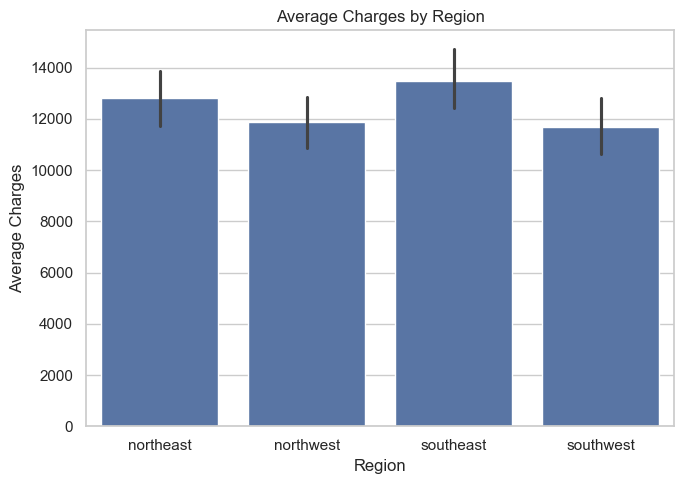

In [7]:
# Average charges by region (handles one-hot with drop_first)
region_cols = [c for c in df.columns if c.startswith("region_")]
df_regions = df.copy()
if region_cols:
    any_region = df_regions[region_cols].any(axis=1)
    region_raw = df_regions[region_cols].idxmax(axis=1).str.replace("region_", "", regex=False)
    df_regions["region"] = np.where(any_region, region_raw, "northeast")
else:
    df_regions["region"] = df_regions["region"]

region_order = ["northeast", "northwest", "southeast", "southwest"]
plt.figure(figsize=(7,5))
try:
    sns.barplot(data=df_regions, x="region", y="charges", order=region_order, errorbar=("ci", 95))
except TypeError:
    sns.barplot(data=df_regions, x="region", y="charges", order=region_order, ci=95)
plt.title("Average Charges by Region")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.tight_layout()
savefig("charges_by_region.png")
plt.show()


Saved ..\reports\figures\correlation_heatmap.png


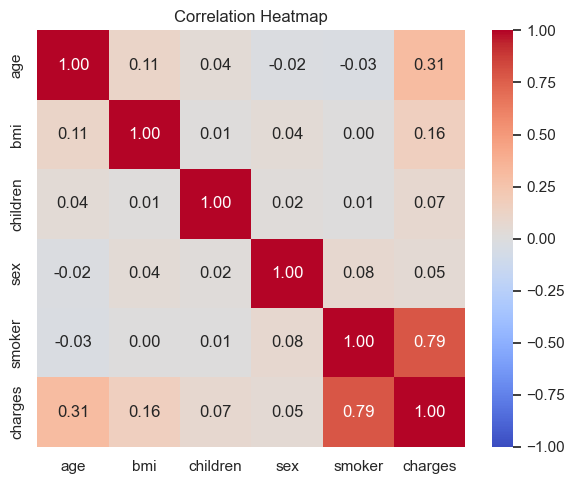

In [8]:
# Correlation heatmap
corr_cols = [c for c in ["age", "bmi", "children", "sex", "smoker", "charges"] if c in df.columns]
plt.figure(figsize=(6,5))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.tight_layout()
savefig("correlation_heatmap.png")
plt.show()


Saved ..\reports\figures\distributions_numeric.png


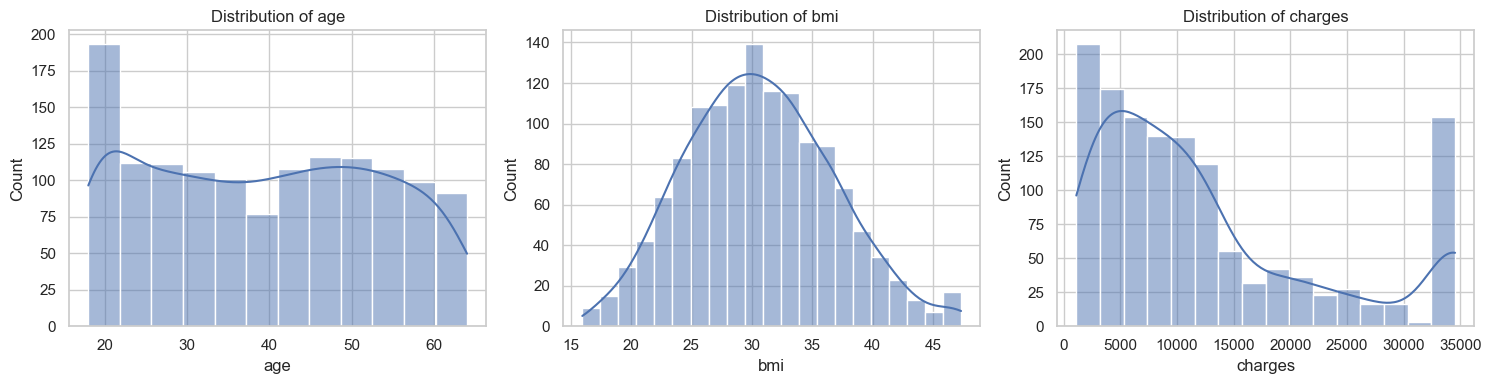

In [9]:
# Distributions of key numeric variables
num_cols = [c for c in ["age", "bmi", "charges"] if c in df.columns]
fig, axes = plt.subplots(1, len(num_cols), figsize=(5*len(num_cols), 4))
if len(num_cols) == 1:
    axes = [axes]
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
savefig("distributions_numeric.png")
plt.show()


Saved ..\reports\figures\boxplots_charges_by_gender_smoker.png


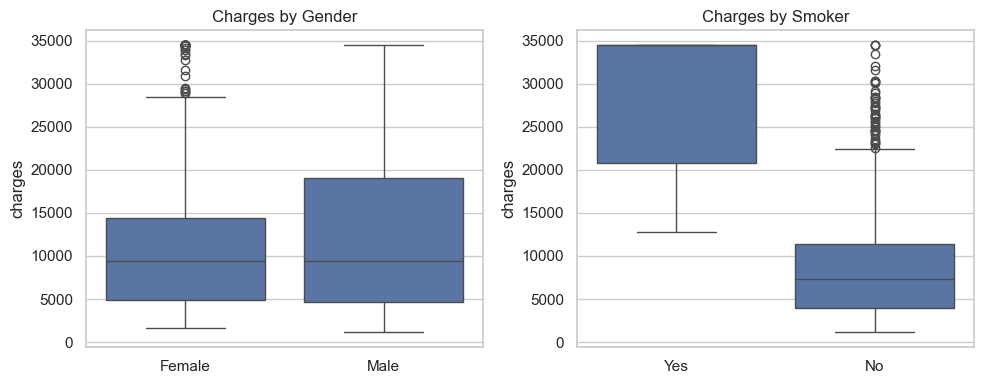

In [10]:
# Boxplots for charges by gender and smoker status
plot_df = df.assign(sex_label=df["sex"].map(SEX_MAP), smoker_label=df["smoker"].map(SMOKER_MAP))
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=plot_df, x="sex_label", y="charges", ax=axes[0])
axes[0].set_title("Charges by Gender")
sns.boxplot(data=plot_df, x="smoker_label", y="charges", ax=axes[1])
axes[1].set_title("Charges by Smoker")
for ax in axes:
    ax.set_xlabel("")
plt.tight_layout()
savefig("boxplots_charges_by_gender_smoker.png")
plt.show()
